In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}

In [3]:
# Criando dataframe
df_vendas = pd.DataFrame.from_dict(dados_vendas)

In [17]:
df_vendas

,mes,vendas,num_mes
0,Janeiro,2000,1
1,Fevereiro,2200,2
2,Março,2300,3
3,Abril,2500,4
4,Maio,2600,5
5,Junho,2700,6
6,Julho,2800,7
7,Agosto,2900,8
8,Setembro,3000,9
9,Outubro,3100,10


In [5]:
# Convertendo coluna mês em número
df_vendas['num_mes'] = range(1,13)

In [14]:
# Dividindo DF em X = Variável para avaliar e Y = Variável que queremos prever
x = df_vendas['num_mes']
y = df_vendas['vendas']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
# Certificar que os dados estejam no formato correto
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)

In [21]:
model_1 = LinearRegression()
model_1.fit(X=x_train, y=y_train)

LinearRegression()

In [22]:
y_predict = model_1.predict(x_test)

In [23]:
y_predict

array([3222.48603352, 3113.12849162, 2128.91061453])

In [24]:
# Avaliando o modelo

mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

In [25]:
r2

0.9804933170681456

In [26]:
mse

5765.308510970296

In [29]:
previsao_dezembro = model_1.predict(df_vendas['num_mes'].values.reshape(-1, 1))

In [30]:
#Valor previsto para dezembro (mês 12, posição 11 do array)
previsao_dezembro[11]

3331.8435754189945

c:\Users\vigudia1\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


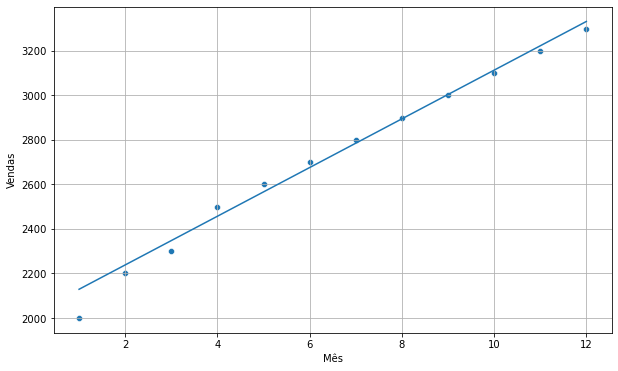

In [33]:
#Avaliando valores reais X valores previstos

plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_mes', y='vendas', data=df_vendas)
plt.plot(df_vendas['num_mes'], model_1.predict(df_vendas[['num_mes']]))
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.grid(True)
plt.show()